In [10]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/scattering/domain_wall_scattering/src')

In [11]:
from DynamicsDefinition import Hamiltonian
from model_building import initialize_system
from dynamics import time_evolution, single_qubit_expectation_values, two_qubit_expectation_values
from plots import plot_expectations, plot_heatmap, plot_correlation_heatmap

## Simulation of linear chain with constant couplings and a potential barrier in qubit j

$$
H = -\lambda\sum_{n=0}^{N}\sigma_n^x\sigma_{n+1}^x + \sigma_n^y\sigma_{n+1}^y + V\sigma_j^z
$$

In domain wall encoding:

$$
H_{DW} = -\lambda\sum_{n=0}^{N}\sigma_x^n -J\sigma_z^0 + J\sigma_z^N + J\sum_{n=0}^{N-1}\sigma_n^z\sigma_{n+1}^z -\frac{1}{2}V\sigma_j^z\sigma_{j+1}^z
$$

In [32]:
N = 5
lmd = 0.02272
J = 1
V = 0*lmd
V_index = 3
state_dictionary = {'0':1}
ti = 0
tf = 280
nstep = 500
environment = False
T2 = 100
gamma = 1/T2

initial_state, final_state, reg_size = initialize_system(state_dictionary, N, encoding='domain_wall', one_step=False)

H = Hamiltonian(N, lmd, J, V, V_index)

dephasing_rates = N*[gamma]

simulation = time_evolution(H, initial_state, ti, tf, nstep, dephasing_rates, environment)
exp_values = {}

exp_values = single_qubit_expectation_values(simulation, H)
exp_values = two_qubit_expectation_values(simulation, H, exp_values)    

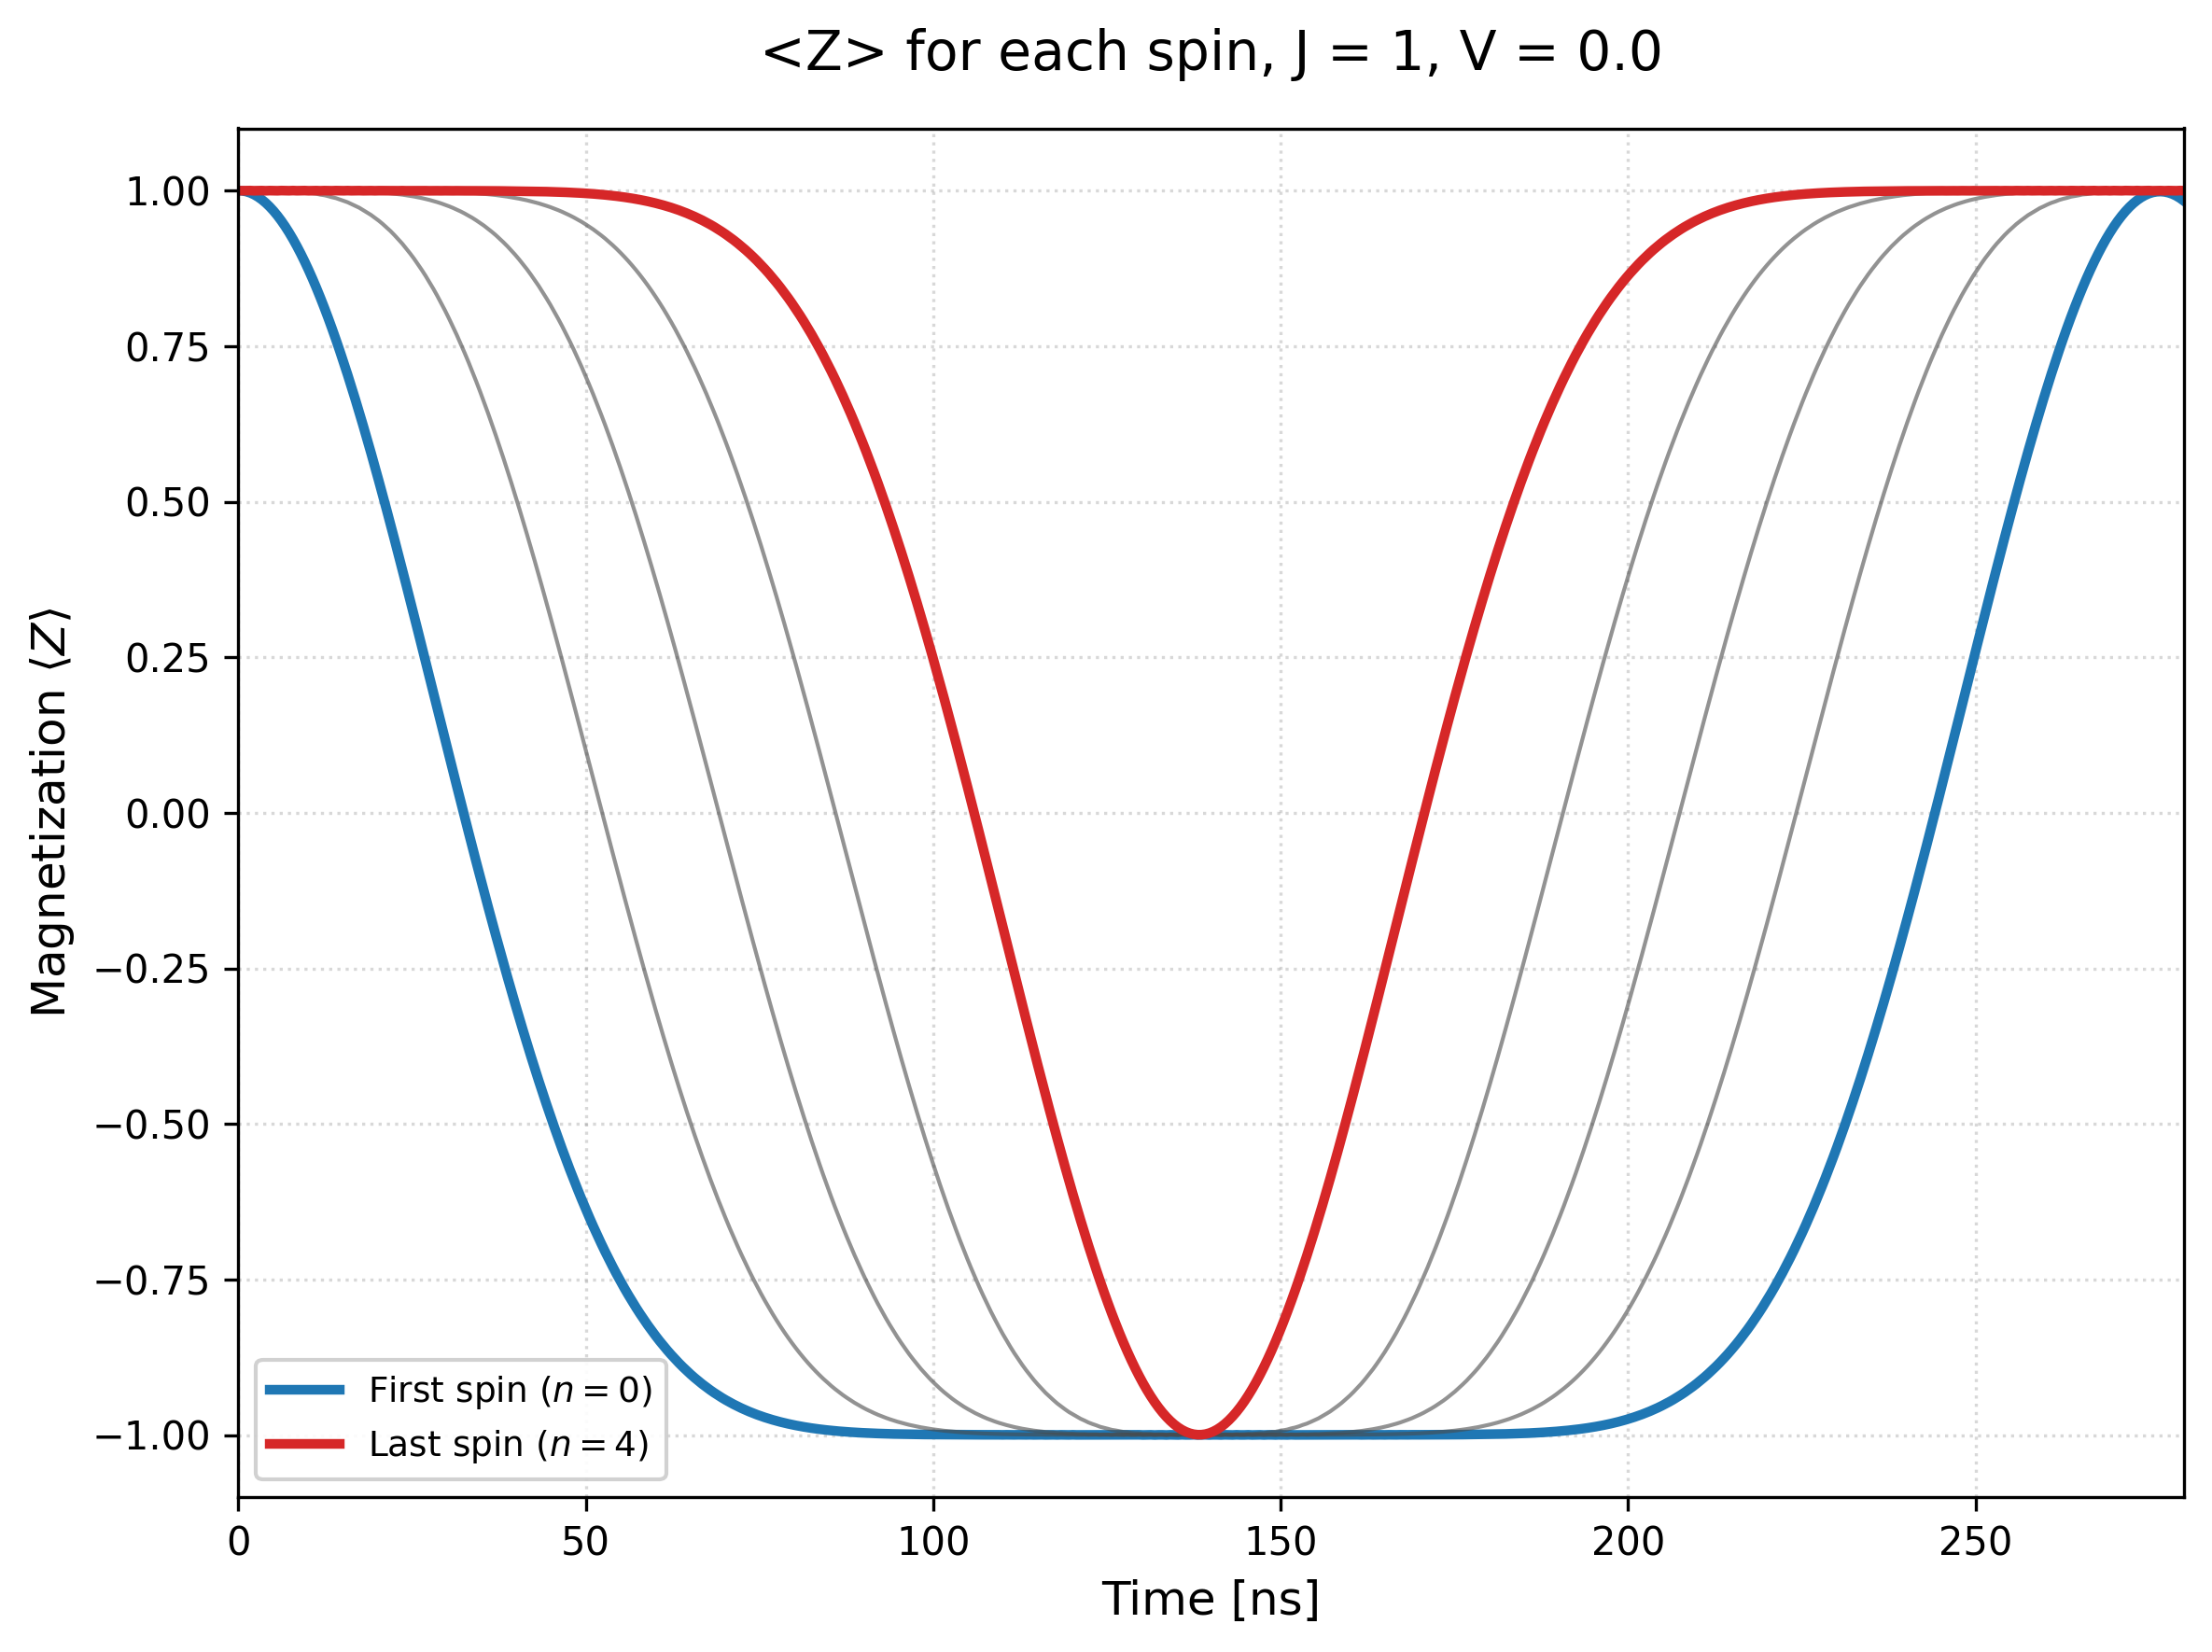

In [33]:
plot_expectations(exp_values['Sz'], N, J, V, ti, tf)

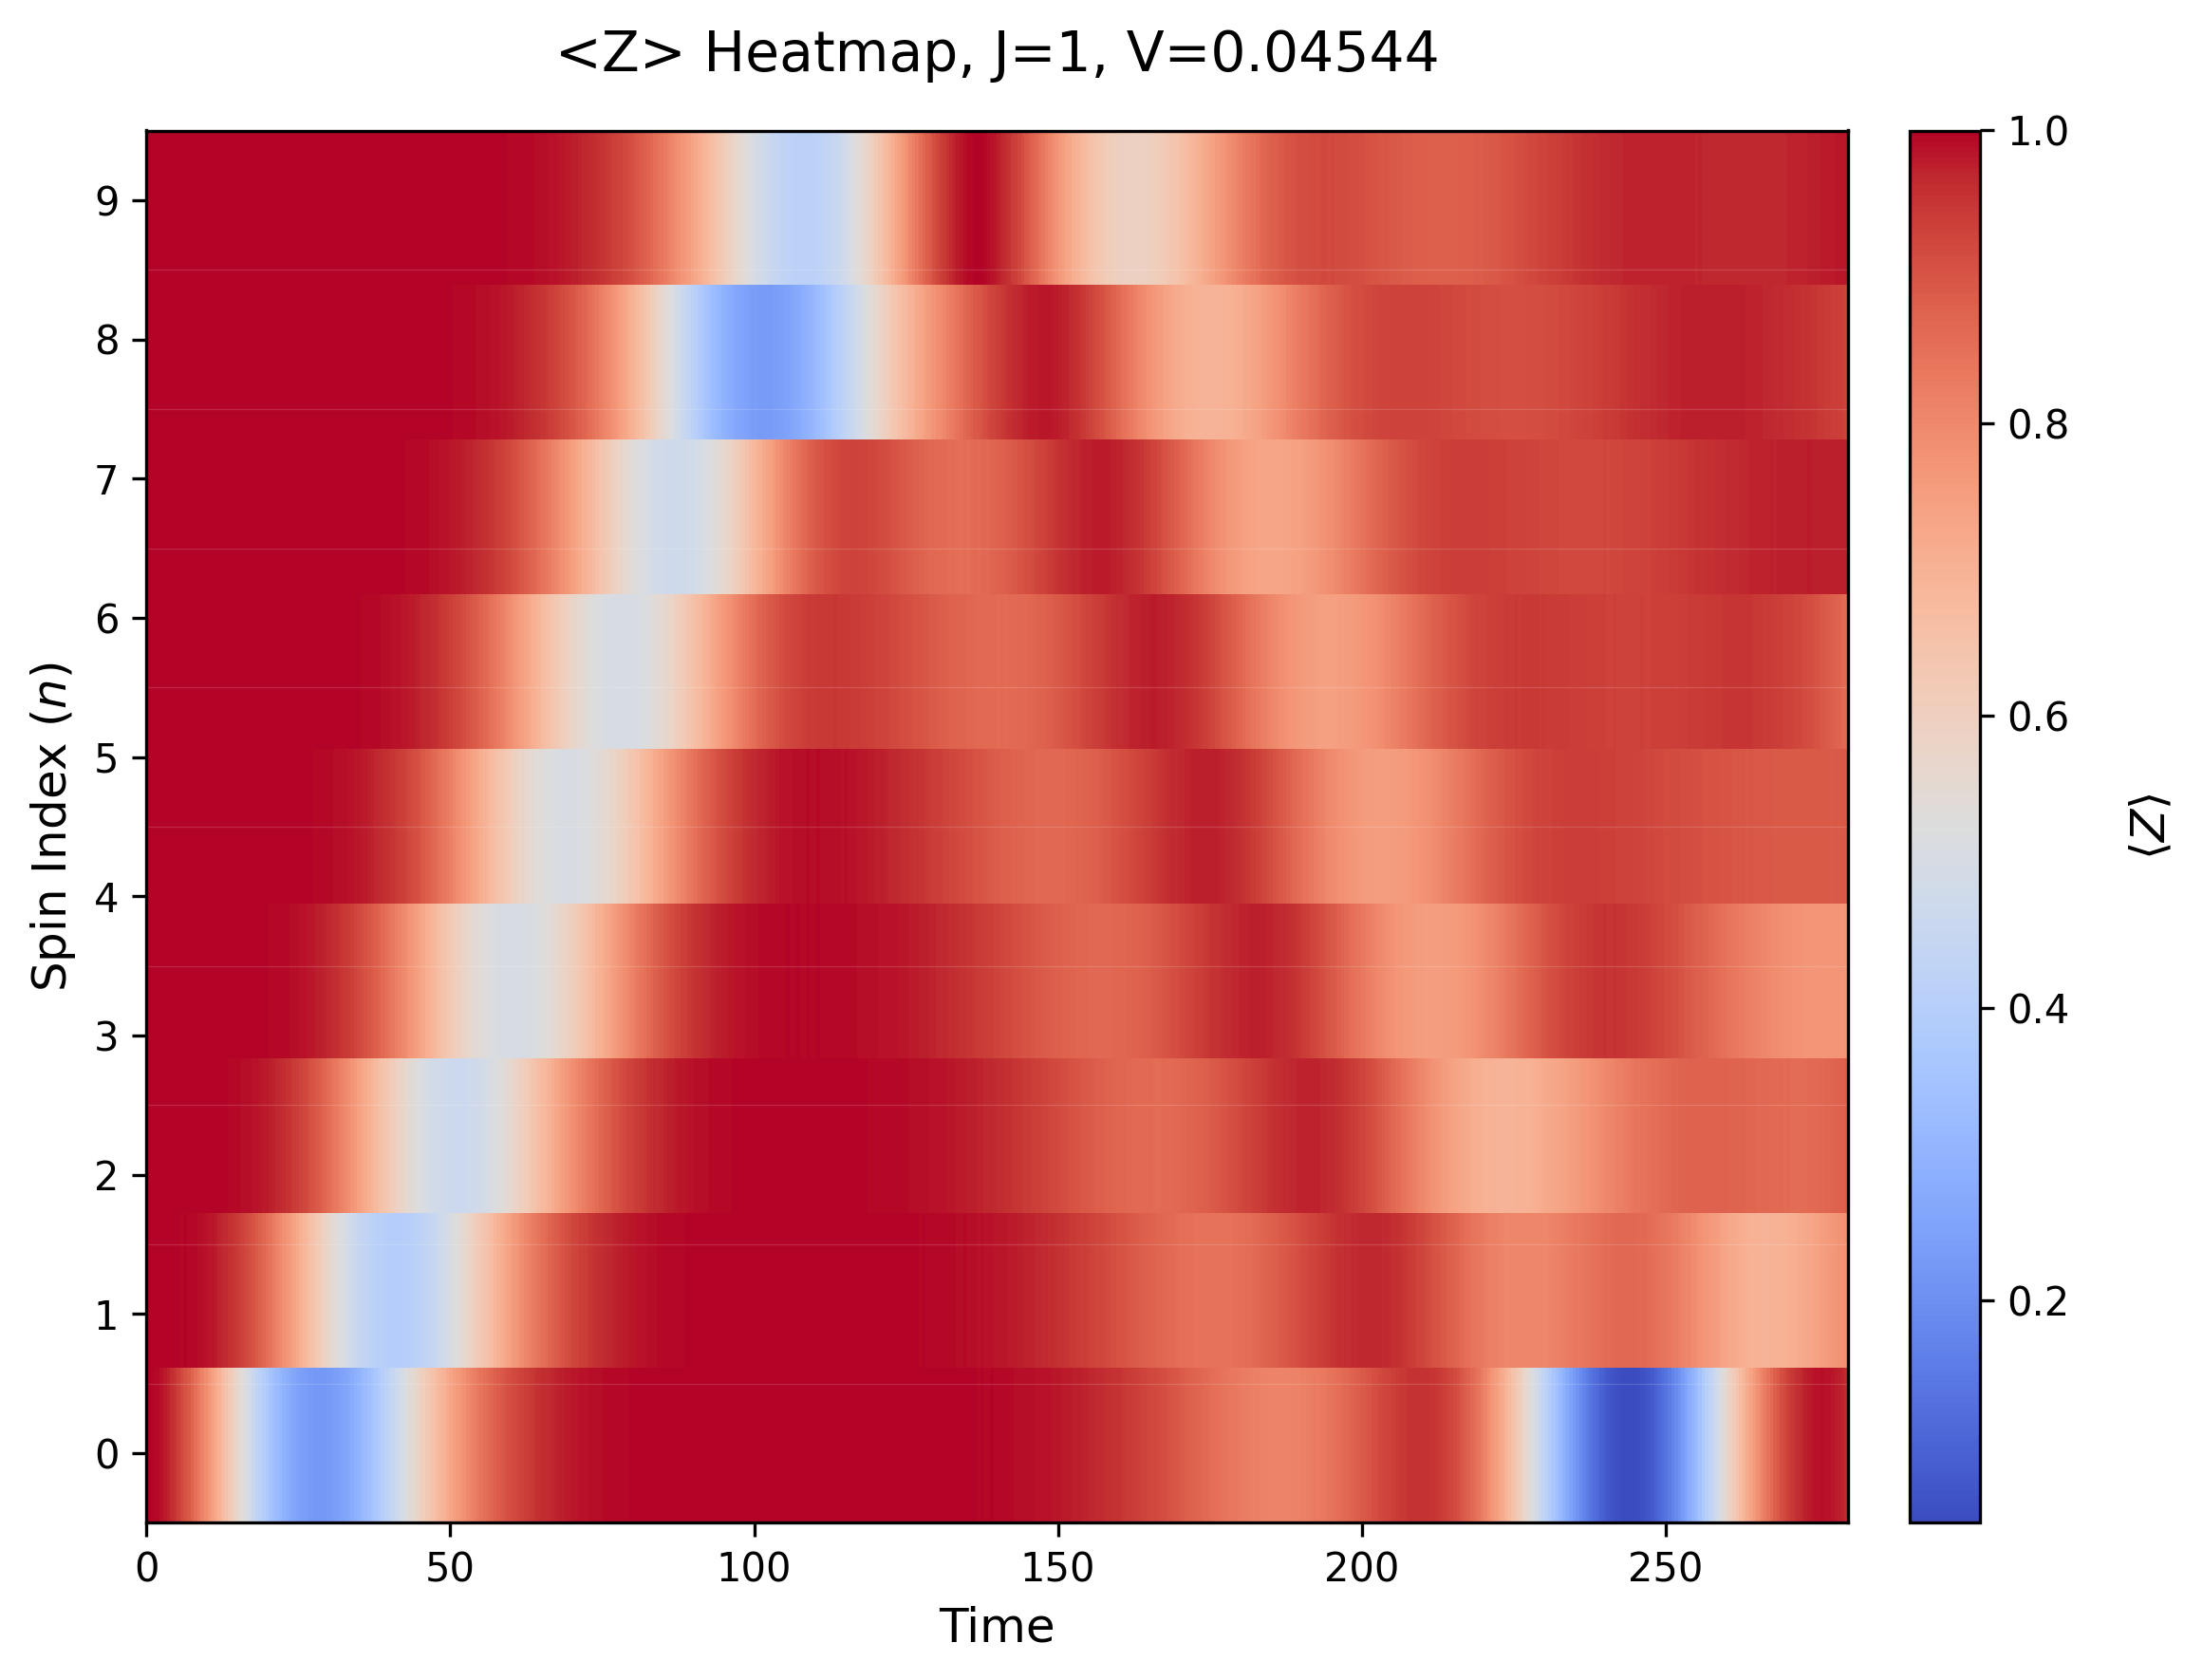

In [5]:
plot_heatmap(exp_values['Szz'], N, J, V, ti, tf)

In [6]:
plot_correlation_heatmap(exp_values['Sz'], N,vvf, J, V, ti, tf)

NameError: name 'vvf' is not defined

In [7]:
N = 5
V_index = 3
state_dictionary = {'0':1}
ti = 0
nstep = 500

lmd_min = 0.02272
lmd_max = 0.02272
lmd_vals = 1

J = -0.5

v_min = 0
v_max = 6*lmd_max
v_vals = 201

lmd = np.linspace(lmd_min, lmd_max, lmd_vals)
V = np.linspace(v_min, v_max, v_vals)

gamma = 0.01

dephasing_rates = N*[gamma]

initial_state, final_state, reg_size = initialize_system(state_dictionary, N, encoding='domain_wall', one_step=False)

min_z_exp_last_qubit = np.zeros((lmd_vals, v_vals))

for index_lmd, l in enumerate(lmd):
    tf = 2*np.pi/l
    for index_v, v in enumerate(V): 
        if index_v % 20 == 0:
            print(index_v)
        H = Hamiltonian(N, l, J, v, V_index)
        simulation = time_evolution(H, initial_state, ti, tf, nstep, dephasing_rates, environment=False)
        exp_values = single_qubit_expectation_values(simulation, H)
        min_z_exp_last_qubit[index_lmd, index_v] = min(exp_values['Sz'][:,-1])

0
20
40
60
80
100
120
140
160
180
200


In [8]:
def calculate_transmission_curve(z_data):
    '''Calculates the transmission fraction for every value of minimum <Z> in the last qubit'''
    transmission = []
    max_z_diff = 1 - z_data[0] #valid if first point has 0 potential
    for index, val in enumerate(z_data):
        transmission.append((max_z_diff/(1 - z_data[index])) -1)
    
    return transmission

transmission = np.zeros((lmd_vals, v_vals))
for i, curve in enumerate(min_z_exp_last_qubit):
    transmission[i] = calculate_transmission_curve(curve)

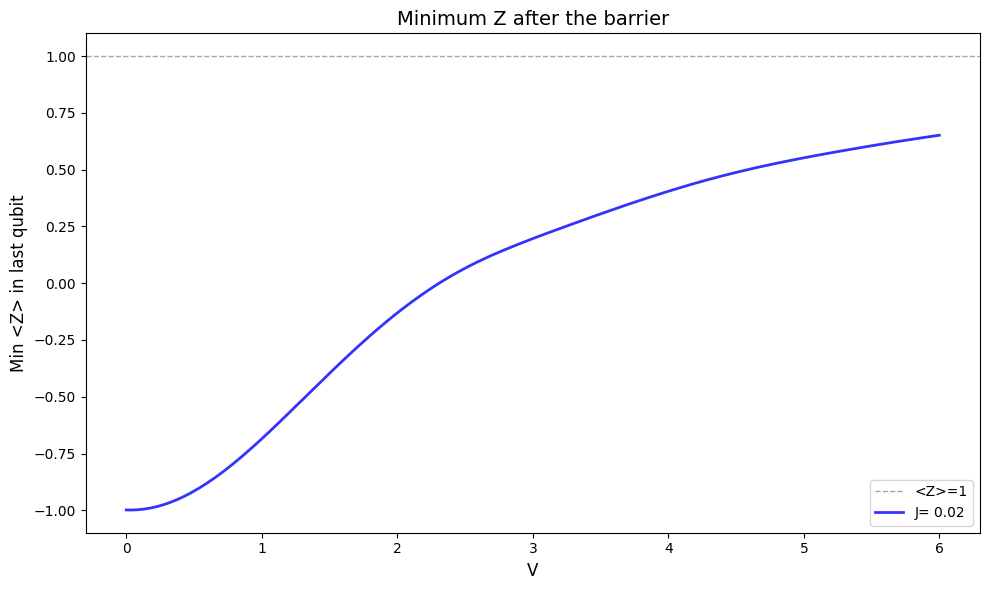

In [9]:
# Assuming your array is called 'data' with shape (m, n)
# where m = first index, n = second index

# Create sample data (replace this with your actual array)
#data = transmission  # 5 lines, 10 x-points
data = min_z_exp_last_qubit
# Create x values (using second index)
x = [v/lmd_max for v in V] # or use specific x values if you have them

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for better distinction
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Add dashed horizontal line at y=1
ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='<Z>=1')

# Plot each line as solid lines
for i in range(data.shape[0]):
    color = colors[i % len(colors)]
    ax.plot(x, data[i, :], 
            label=f'J= {lmd[i]:.2f}', 
            color=color, 
            linewidth=2,           # Solid line with thickness 2
            linestyle='-',         # Explicitly set to solid line
            marker='',             # Remove markers for clean solid lines
            alpha=0.8)             # Slight transparency

# CONFIGURE AXIS BOUNDS - Adjust these values as needed
# Set x-axis limits

#ax.set_xlim(min(x), max(x))
#ax.set_yscale("log")


# Customize the plot
ax.set_xlabel('V', fontsize=12)
ax.set_ylabel('Min <Z> in last qubit', fontsize=12)
ax.set_title('Minimum Z after the barrier', fontsize=14)
ax.legend(fontsize=10)


plt.tight_layout()
plt.show()



In [ ]:
#100% = Z value when V = 0
#0% = Z value = 1

data = min_z_exp_last_qubit
print("Min <Z>:", data[0,0])
print("<Z> when E=V:", data[0,-1])
print("100% Transmission <Z>:", 1 - data[0,0])
print("Transmission <Z> when E=V:", 1 - data[0,-1])
print("Transmission rate when E=V:", (1 - data[0,-1])/(1 - data[0,0])*100, "%" )
print("Inverse transmission:", (1 - data[0,0])/(1 - data[0,-1]))

Min <Z>: -0.8225180608345835
<Z> when E=V: 0.7500842765521727
100% Transmission <Z>: 1.8225180608345835
Transmission <Z> when E=V: 0.2499157234478273
Transmission rate when E=V: 13.71266100558607 %
Inverse transmission: 7.292530600680891
